In [76]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import scipy.signal as sig
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys import ecephys_session
%matplotlib inline

# fix slow autocomplete
%config Completer.use_jedi = False

In [77]:
import platform
platstring = platform.platform()

if 'Darwin' in platstring:
    # OS X 
    data_root = "/Volumes/Brain2019/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn1' in platstring):
    # then on AWS
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2019/"
    data_root = "/run/media/tom.chartrand/Brain2019"

manifest_path = os.path.join(data_root, "dynamic-brain-workshop/visual_coding_neuropixels/2019/manifest.json")


In [113]:
#Get sessions from cache 750749662

cache = EcephysProjectCache.fixed(manifest=manifest_path)
sessions = cache.get_sessions()

#Assign session and get units

#session = cache.get_session_data(sessions.index.values[0])
session = cache.get_session_data(750749662)
session_units = session.units

In [134]:
#Define recording areas

rec_area_1 = "VISp"
rec_units_1 = session_units[session_units.structure_acronym == rec_area_1]
rec_units_1 = rec_units_1.sort_values(by=['probe_vertical_position'], ascending=False)

rec_area_2 = "TH"
rec_units_2 = session_units[session_units.structure_acronym == rec_area_2]
rec_units_2 = rec_units_2.sort_values(by=['probe_vertical_position'], ascending=False)

visual_areas = ['VISl','VISal','VISrl','VISam','VISpm']

corr_unit_ids = []
corr_units = pd.DataFrame()


for area in visual_areas:
    rec_units_vis = session_units[session_units.structure_acronym == area]
    rec_units_vis = rec_units_vis.sort_values(by=['probe_vertical_position'], ascending=False)
    
    rec_unit_ids = session_units[session_units.structure_acronym == area].index.values
    corr_unit_ids = np.append(corr_unit_ids, rec_unit_ids)
    corr_units = corr_units.append(rec_units_vis)
    

    
    
    
    
    
    

,PT_ratio,amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,l_ratio,...,channel_local_index,structure_acronym,structure_id,probe_horizontal_position,probe_id,probe_vertical_position,probe_description,location,sampling_rate,lfp_sampling_rate
unit_id,,,,,,,,,,,,,,,,,,,,,
914689427,0.100322,114.639525,0.023228,273,407.62,4.677236,0.518325,0.422467,37.924508,9.649074e-03,...,309,VISl,409.0,11,769322808,3100,probeD,,29999.919305,2499.993275
914689405,0.378851,188.521515,0.024450,262,171.49,3.323582,0.636324,0.467186,34.454471,4.303770e-02,...,298,VISl,409.0,59,769322808,3000,probeD,,29999.919305,2499.993275
914689407,1.154075,115.313835,0.025565,263,224.08,3.779504,10.713431,0.033292,75.341707,1.210558e-02,...,298,VISl,409.0,59,769322808,3000,probeD,,29999.919305,2499.993275
914689371,4.627452,136.397235,0.012641,245,206.93,3.467088,7.752367,0.151714,61.067665,3.005014e-02,...,289,VISl,409.0,11,769322808,2900,probeD,,29999.919305,2499.993275
914689373,6.460315,148.506150,0.009623,246,324.18,2.935285,3.608794,0.197543,36.688310,8.403372e-02,...,289,VISl,409.0,11,769322808,2900,probeD,,29999.919305,2499.993275
914689327,1.538348,152.822280,0.025100,223,241.61,2.989076,1.959239,0.335104,33.888798,3.571935e-02,...,282,VISl,409.0,59,769322808,2840,probeD,,29999.919305,2499.993275
914689353,2.741863,252.333510,0.001052,236,134.46,6.553643,1.418505,0.000000,60.283274,2.155224e-03,...,282,VISl,409.0,59,769322808,2840,probeD,,29999.919305,2499.993275
914689361,1.001697,143.880360,0.001102,240,142.55,4.725467,2.155768,0.056986,58.920715,2.369364e-03,...,283,VISl,409.0,27,769322808,2840,probeD,,29999.919305,2499.993275
914689349,6.614902,228.958860,0.007802,234,151.12,3.198235,2.403878,0.235697,40.704320,2.743268e-02,...,281,VISl,409.0,11,769322808,2820,probeD,,29999.919305,2499.993275


In [136]:
#Subsample recording areas to make testing analysis easier

my_units = rec_units_1

all_units = my_units.append(corr_units)

#sample_units = my_units[20:30]
#sample_units = sample_units.append(my_units[-10:])

all_units

,PT_ratio,amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,l_ratio,...,channel_local_index,structure_acronym,structure_id,probe_horizontal_position,probe_id,probe_vertical_position,probe_description,location,sampling_rate,lfp_sampling_rate
unit_id,,,,,,,,,,,,,,,,,,,,,
914688787,0.419568,118.048125,0.017673,379,327.33,4.041869,0.779073,0.499326,40.089659,3.168952e-02,...,291,VISp,385.0,27,769322806,2920,probeC,,29999.993938,2499.999495
914688767,0.522367,60.222045,0.042375,369,290.99,2.708982,6.933832,0.094555,52.988940,3.861281e-02,...,286,VISp,385.0,59,769322806,2880,probeC,,29999.993938,2499.999495
914688769,0.409751,106.548000,0.014914,370,261.01,4.386418,1.811133,0.207885,51.999751,8.116369e-03,...,286,VISp,385.0,59,769322806,2880,probeC,,29999.993938,2499.999495
914688771,0.582363,78.085020,0.039145,371,347.90,2.473623,3.997753,0.303409,37.228916,8.885912e-02,...,286,VISp,385.0,59,769322806,2880,probeC,,29999.993938,2499.999495
914688757,0.488814,79.858545,0.068243,364,289.50,3.554292,4.513833,0.184083,51.761587,2.221780e-02,...,283,VISp,385.0,27,769322806,2840,probeC,,29999.993938,2499.999495
914688739,0.687375,101.119005,0.008221,355,274.16,5.630593,6.826997,0.008941,86.088478,2.849230e-04,...,280,VISp,385.0,43,769322806,2820,probeC,,29999.993938,2499.999495
914688735,0.426492,150.553065,0.002147,353,155.44,5.021077,0.870949,0.049942,65.600458,4.132202e-04,...,279,VISp,385.0,27,769322806,2800,probeC,,29999.993938,2499.999495
914688697,0.473257,77.702625,0.017000,334,155.80,3.411118,9.499073,0.045343,59.961221,1.369992e-02,...,276,VISp,385.0,43,769322806,2780,probeC,,29999.993938,2499.999495
914688711,0.427069,97.710015,0.029376,341,203.80,3.167155,5.630997,0.088412,40.458272,4.806301e-02,...,276,VISp,385.0,43,769322806,2780,probeC,,29999.993938,2499.999495


In [127]:
#Get stimulus presentation IDs for a given stimulus 

stim_table = session.get_presentations_for_stimulus('drifting_gratings')

#And drop blank presentations

stim_table=stim_table[stim_table.orientation != 'null']
stim_types = len(stim_table.orientation.unique())

stim_orien = stim_table.orientation.unique()


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [1]:
stim_table

NameError: name 'stim_table' is not defined

In [137]:
#Optimise matrix for storing correlation values

bin_width = 0.001
num_units = len(sample_units)
my_units_size = len(my_units.index.values)
corr_units_size = len(corr_units.index.values)
num_stims = 8
peak_matrix = np.zeros((num_units, num_units, num_stims)) 
bins = np.arange(0,0.5,bin_width)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:1971: RuntimeWarning: invalid value encountered in true_divide
  correls /= np.sqrt(np.dot(x, x) * np.dot(y, y))


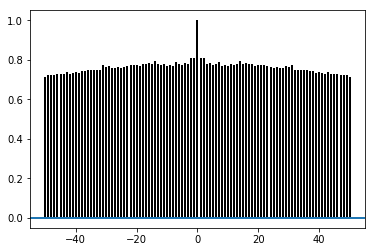

In [91]:
#Loop through different orientations, and compute a fft ccx for every unit vs every unit - store output in peak_matrix

for trials in range(num_stims):    
    
    stim_presentation_ids = stim_table[stim_table.orientation == stim_orien[trials]].index.values

    histograms = session.presentationwise_spike_counts(
        bin_edges=bins,
        stimulus_presentation_ids=stim_presentation_ids,
        unit_ids=sample_units.index.values
    )
    
    mean_histograms = histograms.mean(dim="stimulus_presentation_id")
    rates = mean_histograms/bin_width
    
    for i in range(num_units):

        for j in range(num_units):
            
            p = plt.xcorr(rates[:,i], rates[:,j], usevlines=True, maxlags=50, normed=True, lw=2)

            corr_df = pd.DataFrame(p[1], p[0], columns = ["corr_R"])

            peak_corr = corr_df.sort_values(by = ["corr_R"], ascending = False)

            peak_lag = (peak_corr.corr_R[peak_corr.index.values[0]])
            
            peak_matrix[i, j, trials] = peak_lag
            
            if peak_corr.index[0] > 0:
            
                peak_matrix[i, j, trials] = peak_lag
                
            elif peak_corr.index[0] == 0:
                peak_matrix[i, j, trials] = np.inf
                
            elif peak_corr.index[0] < 0: 
                
                peak_matrix[i, j, trials] = -(peak_lag)
    
    

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


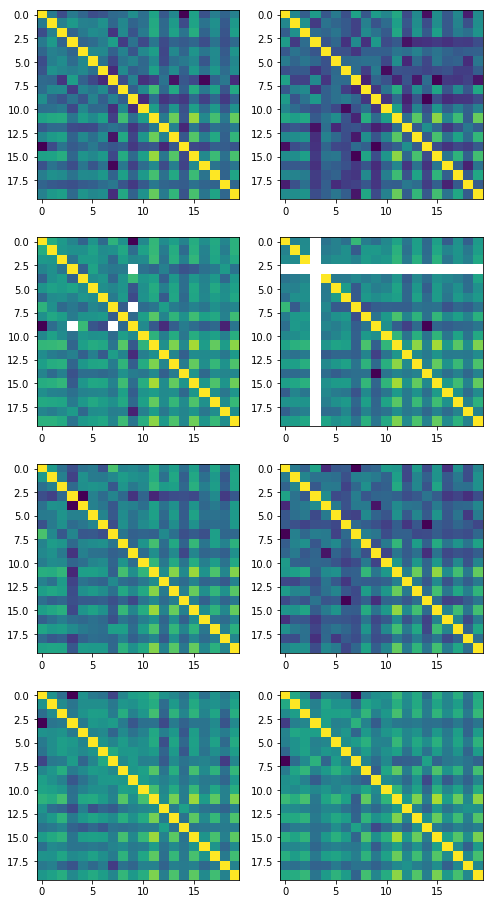

In [100]:
fig,ax = plt.subplots(4, 2, figsize=(8,16))
ax = ax.ravel()

for i, a in enumerate(ax):
    a.imshow(np.log(peak_matrix[:,:,i]), aspect="auto", cmap=plt.get_cmap('viridis'))

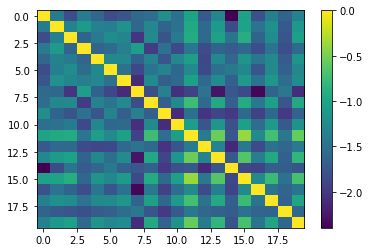

In [104]:
plt.imshow(np.log(peak_matrix[:,:,0]), aspect="auto", cmap=plt.get_cmap('viridis'))
plt.colorbar()


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:1971: RuntimeWarning: invalid value encountered in true_divide
  correls /= np.sqrt(np.dot(x, x) * np.dot(y, y))


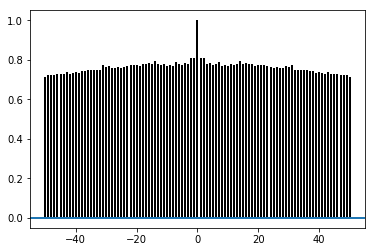

In [105]:
#Loop through different orientations, and compute a fft ccx for every unit vs every unit - store output in peak_matrix

lag_matrix = np.zeros((num_units, num_units, num_stims)) 

for trials in range(num_stims):    
    
    stim_presentation_ids = stim_table[stim_table.orientation == stim_orien[trials]].index.values

    histograms = session.presentationwise_spike_counts(
        bin_edges=bins,
        stimulus_presentation_ids=stim_presentation_ids,
        unit_ids=sample_units.index.values
    )
    
    mean_histograms = histograms.mean(dim="stimulus_presentation_id")
    rates = mean_histograms/bin_width
    
    for i in range(num_units):

        for j in range(num_units):
            
            p = plt.xcorr(rates[:,i], rates[:,j], usevlines=True, maxlags=50, normed=True, lw=2)

            corr_df = pd.DataFrame(p[1], p[0], columns = ["corr_R"])

            peak_corr = corr_df.sort_values(by = ["corr_R"], ascending = False)

            peak_lag = peak_corr.index.values[0]
            
            lag_matrix[i, j, trials] = peak_lag 
    

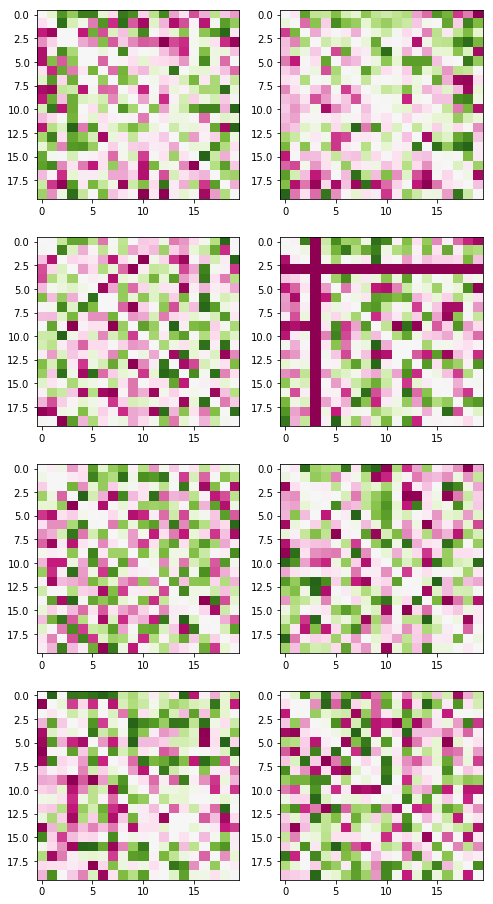

In [107]:
fig,ax = plt.subplots(4, 2, figsize=(8,16))
ax = ax.ravel()

for i, a in enumerate(ax):
    a.imshow(lag_matrix[:,:,i], aspect="auto", cmap=plt.get_cmap('PiYG'))

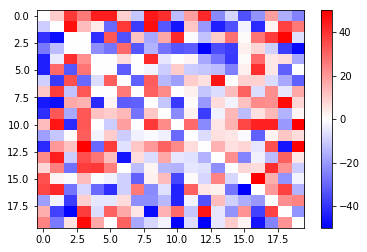

In [89]:
plt.imshow((lag_matrix[:,:,0]), aspect="auto", cmap=plt.get_cmap('viridis'))
plt.colorbar()



In [ ]:
#Loop through different orientations, and compute a fft ccx for every unit vs every unit - store output in peak_matrix

peak_matrix = np.zeros((my_units_size, corr_units_size, num_stims)) 
lag_matrix = np.zeros((my_units_size, corr_units_size, num_stims)) 

for trials in range(num_stims):    
    
    stim_presentation_ids = stim_table[stim_table.orientation == stim_orien[trials]].index.values

    my_unit_histograms = session.presentationwise_spike_counts(
        bin_edges=bins,
        stimulus_presentation_ids=stim_presentation_ids,
        unit_ids=my_units.index.values
    )
    
    mean_histograms = my_unit_histograms.mean(dim="stimulus_presentation_id")
    rates = mean_histograms/bin_width
    
    corr_unit_histograms = session.presentationwise_spike_counts(
        bin_edges=bins,
        stimulus_presentation_ids=stim_presentation_ids,
        unit_ids=corr_units.index.values
    )
    
    corr_histograms = corr_unit_histograms.mean(dim="stimulus_presentation_id")
    corr_rates = corr_histograms/bin_width
    
    
    
    for i in range(my_units_size):

        for j in range(corr_units_size):
            
            p = plt.xcorr(rates[:,i], corr_rates[:,j], usevlines=True, maxlags=50, normed=True, lw=2)

            corr_df = pd.DataFrame(p[1], p[0], columns = ["corr_R"])

            peak_corr = corr_df.sort_values(by = ["corr_R"], ascending = False)

            peak_lag = (peak_corr.corr_R[peak_corr.index.values[0]])
            
            peak_matrix[i, j, trials] = peak_lag
            
            if peak_corr.index[0] > 0:
            
                peak_matrix[i, j, trials] = peak_lag
                
            elif peak_corr.index[0] == 0:
                peak_matrix[i, j, trials] = np.inf
                
            elif peak_corr.index[0] < 0: 
                
                peak_matrix[i, j, trials] = -(peak_lag)
                
            peak_lag = peak_corr.index.values[0]
            
            lag_matrix[i, j, trials] = peak_lag 
    
    